In [1]:
#upload kaggle.json in colab
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gauravtank","key":"e9854efab2bfa5d6db254c6aecb71bcf"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d tongpython/cat-and-dog

 96% 209M/218M [00:02<00:00, 101MB/s] 
100% 218M/218M [00:02<00:00, 88.9MB/s]


In [3]:
!unzip cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [4]:
train_path= '/content/training_set/training_set'  # /content/training_set/training_set
test_path= '/content/test_set/test_set'

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


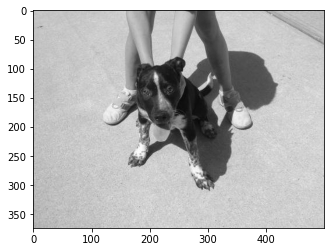

In [6]:
CATEGORIES= ['dogs', 'cats']
for category in CATEGORIES:
  path= os.path.join(train_path, category)
  for images in os.listdir(path):
    img_array= cv2.imread(os.path.join(path, images), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap= 'gray')
    break
  break

In [7]:
img_array.shape

(374, 500)

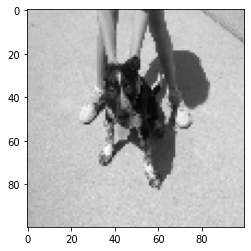

In [8]:
IMG_SIZE= 100
new_array= cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap= 'gray')
plt.show()

In [9]:
training_data= []

def create_training_data():
  for category in CATEGORIES:
    path= os.path.join(train_path, category)
    class_num= CATEGORIES.index(category)
    for images in os.listdir(path):
      try:
        img_array= cv2.imread(os.path.join(path, images), cv2.IMREAD_GRAYSCALE)
        new_array= cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass
create_training_data()

In [24]:
testing_data= []

def create_testing_data():
  for category in CATEGORIES:
    path= os.path.join(test_path, category)
    class_num= CATEGORIES.index(category)
    for images in os.listdir(path):
      try:
        img_array= cv2.imread(os.path.join(path, images), cv2.IMREAD_GRAYSCALE)
        new_array= cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        testing_data.append([new_array, class_num])
      except Exception as e:
        pass
create_testing_data()

In [10]:
len(training_data)

8005

In [25]:
len(testing_data)

2023

In [26]:
import random
random.shuffle(testing_data)

In [55]:
test_X= []
test_y= []

In [56]:
for features, labels in testing_data:
  test_X.append(features)
  test_y.append(labels)
test_X= np.array(test_X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_y= np.array(test_y).reshape(-1 ,1)

In [57]:
test_X.shape, test_y.shape

((2023, 100, 100, 1), (2023, 1))

In [11]:
import random
random.shuffle(training_data)  
#we don't want to first traing our model for dog then for cat. Therefore we shffle our dataset

In [58]:
train_X= []
train_y= []

In [59]:
for features,label in training_data:
  train_X.append(features) 
  train_y.append(label)
train_X= np.array(train_X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  
train_y= np.array(train_y).reshape(-1, 1)
#cvts into numpy array and reshapes it in 4D  -1= total records, 1= gray img

In [61]:
train_X.shape, train_y.shape

((8005, 100, 100, 1), (8005, 1))

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [18]:
train_X.shape, len(train_y)

((8005, 100, 100, 1), 8005)

In [19]:
train_X= train_X/255.0   #Normalizing Features

In [22]:
abcd= np.array(train_y).reshape(-1,1)  ##

In [23]:
abcd.shape  ##

(8005, 1)

In [47]:
model= Sequential()

In [48]:
model.add(Conv2D(filters= 64,
                 kernel_size= (3,3),
                 input_shape= train_X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2,2)))

In [49]:
model.add(Conv2D(filters= 64,
                 kernel_size= (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2,2)))

In [50]:
model.add(Flatten())
model.add(Dense(units= 64))

In [51]:
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [52]:
model.compile(loss= 'binary_crossentropy',
              optimizer= 'adam',
              metrics= ['accuracy'])

In [62]:
model.fit(train_X, train_y, batch_size=32, validation_data=(test_X, test_y), epochs= 50)

Epoch 1/50
251/251 [==============================] - 47s 19ms/step - loss: 25.7426 - accuracy: 0.5211 - val_loss: 0.6862 - val_accuracy: 0.5348
Epoch 2/50
251/251 [==============================] - 4s 17ms/step - loss: 0.6813 - accuracy: 0.5500 - val_loss: 0.6850 - val_accuracy: 0.5403
Epoch 3/50
251/251 [==============================] - 4s 18ms/step - loss: 0.6657 - accuracy: 0.5615 - val_loss: 0.6931 - val_accuracy: 0.5264
Epoch 4/50
251/251 [==============================] - 4s 18ms/step - loss: 0.6591 - accuracy: 0.5717 - val_loss: 0.6953 - val_accuracy: 0.5363
Epoch 5/50
251/251 [==============================] - 4s 18ms/step - loss: 0.6464 - accuracy: 0.5901 - val_loss: 0.7567 - val_accuracy: 0.5269
Epoch 6/50
251/251 [==============================] - 4s 17ms/step - loss: 0.6204 - accuracy: 0.6106 - val_loss: 0.7287 - val_accuracy: 0.5344
Epoch 7/50
251/251 [==============================] - 4s 17ms/step - loss: 0.6107 - accuracy: 0.6162 - val_loss: 0.7367 - val_accuracy: 0.53

In [63]:
import matplotlib.pyplot as plt

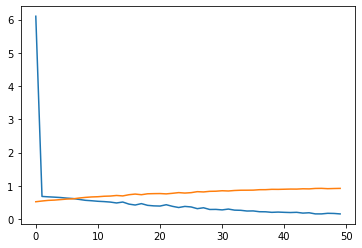

In [66]:
loss= model.history.history['loss']
accuracy= model.history.history['accuracy']
plt.plot(loss)
plt.plot(accuracy)

In [67]:
from keras.models import save_model

In [73]:
model.save('/content/cats&dogs.h5')

In [78]:
train_X[3].reshape(1, IMG_SIZE, IMG_SIZE, 1).shape

(1, 100, 100, 1)

In [89]:
model.predict(train_X[325].reshape(1, IMG_SIZE, IMG_SIZE, 1))

array([[0.3326486]], dtype=float32)

In [90]:
pred_img_path= '/content/training_set/training_set/cats/cat.100.jpg'

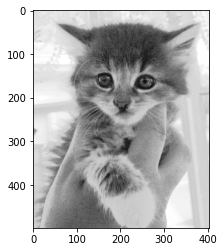

In [96]:
img_pred= cv2.imread(pred_img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_pred, cmap='gray')

In [97]:
img_pred.shape

(499, 403)

[[0.5602742]]


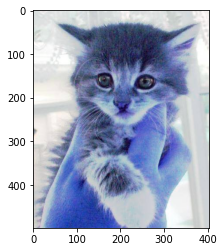

In [105]:
def prediction(image_path):
  image= cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  img= cv2.imread(image_path)
  image= cv2.resize(image, (IMG_SIZE, IMG_SIZE)).reshape(1, IMG_SIZE, IMG_SIZE, 1)
  #print(image.shape)
  print(model.predict(image))
  plt.imshow(img)
prediction(pred_img_path)

[[0.16959688]]


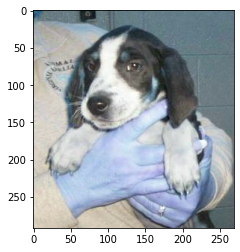

In [113]:
prediction('/content/training_set/training_set/dogs/dog.10.jpg')

[[0.9999994]]


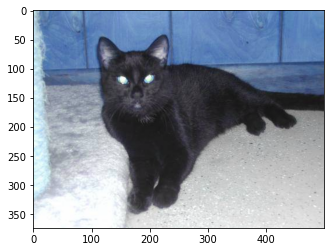

In [112]:
prediction('/content/training_set/training_set/cats/cat.1007.jpg')